 # Machine Learning LAB 1
 Academic Year 2021/22, P. Zanuttigh, U. Michieli, F. Barbato, D. Shenaj, G. Rizzoli

The notebook contains some simple tasks to be performed about classification and regression. Complete **all** the required code sections and answer to **all** the questions.

### IMPORTANT 1: make sure to rerun all the code from the beginning to obtain the results for the final version of your notebook, since this is the way we will do it before evaluating your notebook!


### IMPORTANT 2: Place your name and ID number. Also recall to save the file as Surname_Name_LAB1.ipynb . Notebooks without name will be discarded.

**Student name**: Filippo Festa<br>
**ID Number**: 2029789


# 1) Classification of Music genre

### Dataset description

A music genre is a conventional category that identifies pieces of music as belonging to a shared tradition or set of conventions. It is to be distinguished from musical form and musical style. The features extracted from these songs can help the machine to assing them to the two genres. 

This dataset is a subset of the dataset provided [here](https://www.kaggle.com/insiyeah/musicfeatures), containing only the data regarding the classical and metal genres.

### We consider 3 features for the classification

1) **tempo**, the speed at which a passage of music is played, i.e., the beats per minute of the musical piece<br>
2) **chroma_stft**, [mean chromagram activation on Short-Time Fourier Transform](https://librosa.org/doc/0.7.0/generated/librosa.feature.chroma_stft.html)<br>
3) **spectral_centroid**, Indicates where the "center of mass" of the spectrum is located, i.e., it is the weighted average of the frequency transform<br>


We first import all the packages that are needed.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv

import pandas as pd
import numpy as np
import scipy as sp
import sklearn as sl
from scipy import stats
import seaborn as sns
from boruta import BorutaPy
from sklearn import datasets
from sklearn import metrics
from sklearn import linear_model
from sklearn import model_selection
from sklearn import ensemble

# Perceptron
Firstly we will implement the perceptron algorithm and use it to learn a halfspace.

**TO DO** Set the random seed, you can use your ID (matricola) or any other number! Try to make various tests changing the seed.

In [2]:
IDnumber = 2029789 #YOUR_ID , try also to change the seed to see the impact of random initialization on the results
np.random.seed(IDnumber)

Load the dataset and then split in training set and test set (the training set is typically larger, you can use a 75% tranining 25% test split) after applying a random permutation to the datset.

A) Load dataset and perform permutation

In [3]:
# Load the dataset
filename = 'data/music.csv'
music = csv.reader(open(filename, newline='\n'), delimiter=',')

header = next(music) # skip first line
print(f"Header: {header}\n")

dataset = np.array(list(music))
print(f"Data shape: {dataset.shape}\n")
print("Dataset Example:")
print(dataset[:10,...])

X = dataset[:,:-1].astype(float) #columns 0,1,2 contain the features
Y = dataset[:,-1].astype(int)    # last column contains the labels

Y = 2*Y-1                        # for the perceptron classical--> -1, metal-->1
m = dataset.shape[0]
print("\nNumber of samples loaded:", m)
permutation = np.random.permutation(m) # random permutation

X = X[permutation]
Y = Y[permutation]

print("\nX Example:")
print(X[:10,...])
print("\nY Example:")
print(Y[:10,...])

Header: ['tempo', 'chroma_stft', 'spectral_centroid', 'label']

Data shape: (200, 4)

Dataset Example:
[['92.28515625' '0.22373830597598895' '2192.798091164326' '0']
 ['161.4990234375' '0.2841730455239421' '1534.0649775815205' '0']
 ['143.5546875' '0.20811288763962318' '1396.8242648287155' '0']
 ['95.703125' '0.31289954089595506' '1680.0882644413368' '0']
 ['123.046875' '0.25857228884109024' '1173.6583080518985' '0']
 ['67.99958881578948' '0.22521197942744986' '715.1893204778178' '0']
 ['95.703125' '0.2840176228179304' '1184.632142061296' '0']
 ['89.10290948275862' '0.2563949682674902' '1358.897902739857' '0']
 ['99.38401442307692' '0.2614892978768399' '1372.8258066922585' '0']
 ['184.5703125' '0.2899787266101455' '1953.0485341566464' '0']]

Number of samples loaded: 200

X Example:
[[1.07666016e+02 5.25430687e-01 3.04667150e+03]
 [1.35999178e+02 6.34761669e-01 3.40310190e+03]
 [1.43554688e+02 3.03928026e-01 1.12826402e+03]
 [8.91029095e+01 3.20224727e-01 1.47480338e+03]
 [6.98374155e+

We are going to classify class "1" (metal) vs class "-1" (classical)

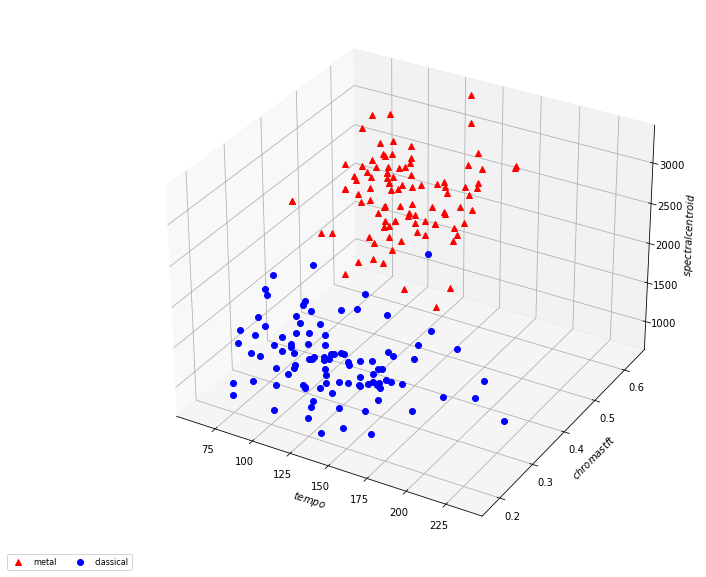

In [4]:
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.figsize"] = (20,10)
ax = plt.subplot(111, projection='3d')
ax.plot(X[:, 0][Y == 1], X[:, 1][Y == 1], X[:, 2][Y == 1], '^', color="r", label="metal")
ax.plot(X[:, 0][Y == -1], X[:, 1][Y == -1], X[:, 2][Y == -1], 'o', color="b", label='classical')
ax.set_xlabel('$tempo$')
ax.set_ylabel('$chroma stft$')
ax.set_zlabel('$spectral centroid$')
plt.legend(loc='upper right', numpoints=1, ncol=3, fontsize=8, bbox_to_anchor=(0, 0))
plt.show()

B) **TO DO** Divide the data into training set and test set (75% of the data in the first set, 25% in the second one)

In [5]:
# Divide in training and test: make sure that your training set
# contains at least 10 elements from class 1 and at least 10 elements
# from class -1! If it does not, modify the code so to apply more random
# permutations (or the same permutation multiple times) until this happens.
# IMPORTANT: do not change the random seed.


'''# m_test needs to be the number of samples in the test set
m_training = int(0.75*dataset.shape[0])
print("m_training:", m_training)

# m_test needs to be the number of samples in the test set
m_test = int(0.25*dataset.shape[0])
print("m_test:", m_test)

# X_training = instances for training set
X_training = X[:m_training,]
#Y_training = labels for the training set
Y_training = Y[:m_training,]

# X_test = instances for test set
X_test = X[m_training:,]
# Y_test = labels for the test set
Y_test = Y[m_training:,]'''

m_training = int(0.75*dataset.shape[0])
m_test = int(0.25*dataset.shape[0])
X_training, X_test, Y_training, Y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=0)

print("\nY_training:\n", Y_training) # to make sure that Y_training contains both 1 and -1
print("Number of classical instances in Y_training:", np.sum(Y_training==-1))
print("Number of metal instances in Y_training:", np.sum(Y_training==1))
print("Shape of X_training set: " + str(X_training.shape))
print("Shape of Y_training set: " + str(Y_training.shape))

print("\nY_test:\n", Y_test)
print("Number of classical instances in Y_test:", np.sum(Y_test==-1))
print("Number of metal instances in Y_test:", np.sum(Y_test==1))
print("Shape of X_test set: " + str(X_test.shape))
print("Shape of Y_test set: " + str(Y_test.shape))


Y_training:
 [ 1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1  1  1  1 -1  1  1  1 -1
 -1  1  1  1  1 -1 -1 -1  1  1 -1  1 -1  1 -1  1  1 -1  1 -1 -1 -1 -1  1
  1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1 -1 -1 -1  1  1
  1  1  1  1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1 -1  1  1
  1  1 -1 -1  1  1 -1  1  1  1  1 -1  1 -1  1  1  1  1  1  1 -1 -1 -1  1
  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1
  1 -1 -1  1  1  1]
Number of classical instances in Y_training: 75
Number of metal instances in Y_training: 75
Shape of X_training set: (150, 3)
Shape of Y_training set: (150,)

Y_test:
 [ 1 -1  1 -1 -1 -1  1 -1  1  1 -1  1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1
  1  1  1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1  1  1 -1  1  1 -1  1  1
 -1 -1]
Number of classical instances in Y_test: 25
Number of metal instances in Y_test: 25
Shape of X_test set: (50, 3)
Shape of Y_test set: (50,)


We add a 1 in front of each sample so that we can use a vector in homogeneous coordinates to describe all the coefficients of the model. This can be done with the function $hstack$ in $numpy$.

In [6]:
# Add a 1 to each sample (homogeneous coordinates)

X_training = np.hstack((np.ones((m_training,1)), X_training))
X_test = np.hstack((np.ones((m_test,1)), X_test))

print("Training set in homogeneous coordinates - X_training:")
print(X_training[:10])

print("\nTest set in homogeneous coordinates - X_test:")
print(X_test[:10])

Training set in homogeneous coordinates - X_training:
[[1.00000000e+00 1.29199219e+02 4.62354610e-01 1.52501713e+03]
 [1.00000000e+00 9.93840144e+01 5.33625514e-01 2.81548238e+03]
 [1.00000000e+00 9.93840144e+01 2.19209088e-01 1.05448959e+03]
 [1.00000000e+00 1.35999178e+02 1.87032426e-01 7.94918486e+02]
 [1.00000000e+00 1.29199219e+02 2.16328362e-01 1.21129634e+03]
 [1.00000000e+00 1.43554688e+02 4.37909370e-01 9.72033527e+02]
 [1.00000000e+00 9.57031250e+01 4.87799881e-01 3.27434216e+03]
 [1.00000000e+00 1.12347147e+02 4.91915016e-01 1.98326431e+03]
 [1.00000000e+00 8.91029095e+01 1.98925769e-01 1.11810879e+03]
 [1.00000000e+00 9.57031250e+01 2.35657963e-01 1.17990865e+03]]

Test set in homogeneous coordinates - X_test:
[[1.00000000e+00 1.61499023e+02 4.63063892e-01 2.30267829e+03]
 [1.00000000e+00 1.43554688e+02 2.34085778e-01 1.27961458e+03]
 [1.00000000e+00 1.29199219e+02 4.36540198e-01 2.46346992e+03]
 [1.00000000e+00 2.15332031e+02 3.04577593e-01 1.46548189e+03]
 [1.00000000e+00

**TO DO** Now complete the function *perceptron*. Since the perceptron does not terminate if the data is not linearly separable, your implementation should return the desired output (see below) if it reached the termination condition seen in class or if a maximum number of iterations have already been run, where one iteration corresponds to one update of the perceptron weights. In case the termination is reached because the maximum number of iterations have been completed, the implementation should return **the best model** seen up to now.

The input parameters to pass are:
- $X$: the matrix of input features, one row for each sample
- $Y$: the vector of labels for the input features matrix X
- $max\_num\_iterations$: the maximum number of iterations for running the perceptron

The output values are:
- $best\_w$: the vector with the coefficients of the best model
- $best\_error$: the *fraction* of misclassified samples for the best model

In [7]:
# standardize the input matrix
from sklearn import preprocessing

# the transformation is computed on training data and then used on all the 3 sets
scaler = preprocessing.StandardScaler().fit(X_training) 

np.set_printoptions(suppress=True) # sets to zero floating point numbers < min_float_eps
X_training = scaler.transform(X_training)
print ("Mean of the training input data (X_training):\n", X_training.mean(axis=0))
print ("\nStd of the training input data (X_training):\n", X_training.std(axis=0))

X_test = scaler.transform(X_test) # use the same transformation on test data
print ("\nMean of the test input data (X_test):\n", X_test.mean(axis=0))
print ("\nStd of the test input data (X_test):\n", X_test.std(axis=0))

Mean of the training input data (X_training):
 [ 0.  0. -0. -0.]

Std of the training input data (X_training):
 [0. 1. 1. 1.]

Mean of the test input data (X_test):
 [ 0.          0.04725301  0.04512297 -0.11701043]

Std of the test input data (X_test):
 [0.         1.13954887 0.8823636  0.92004014]


In [8]:
# A template is provided, but feel free to build a different implementation

def perceptron_update(current_w, x, y):
    # Place in this function the update rule of the perceptron algorithm
    new_w = current_w + np.dot(x,y)

    return new_w

def perceptron(X, Y, max_num_iterations):
    # Place in this function the main section of the perceptron algorithm
    
    #init the algorith with w=0, use a best_w variable to keep track of the best solution
    curr_w = np.zeros((4))
    best_w = np.array([])
    num_samples = len(X)
    best_error = 1                  # error = num_misclassified/num_samples
    errors_history = np.array([])
    
    index_misclassified = 0        # will be ovewritten
    num_misclassified = 0           # will be ovewritten
    
    
    # main loop continue until all samples correctly classified or max # iterations reached
    num_iter = 1
    
    while ((index_misclassified != -1) and (num_iter < max_num_iterations)):
        
        #print("\n\n\niteration:", num_iter)
        index_misclassified = -1
        index_misclassified_arr = np.array([])
        num_misclassified = 0
        
        # avoid working always on the same sample, you can use a random permutation or randomize the choice of misclassified
        permute = np.random.permutation(len(X))
        X = X[permute]
        Y = Y[permute]
        
        for i in range(num_samples):
            # check if the i-th randomly selected sample is misclassified
            # store the number of randomly classified samples and the index of at least one of them  (-> classified??)
            if((Y[i]*(np.dot(curr_w, X[i,:]))) <= 0):
                num_misclassified += 1
                index_misclassified_arr = np.append(index_misclassified_arr, i)                  
        
        #print("\nnum_misclassified:", num_misclassified)
        #print("\nindex_misclassified_arr:\n", index_misclassified_arr)
        
        #print("\n\ncurr_w:", curr_w)
        #print("\nbest_error", best_error)
        #print("\nerror:", num_misclassified/num_samples)
        # update  error count, keep track of best solution
        errors_history = np.append(errors_history, num_misclassified/num_samples)
        if(best_error > num_misclassified/num_samples):           # if best_error == num_misclassified/num_samples
            best_error = num_misclassified/num_samples             # then there's no update! (put >= for the update)
            best_w = curr_w
        #print("\nupdated best_error:", best_error)
        #print("\nbest_w", best_w)
        #print("\nerrors_history:\n", errors_history)
        
        #call update function using a misclassifed sample
        index_misclassified_arr = index_misclassified_arr.astype(int)
        if(num_misclassified != 0):
            index_misclassified = np.random.choice(index_misclassified_arr)
            #print("\n\nindex_misclassified:", index_misclassified)
            #print("\ncurr_w:", curr_w)
            curr_w = perceptron_update(curr_w, X[index_misclassified,:], Y[index_misclassified])
        #print("\nupdated curr_w:", curr_w)
        
        num_iter += 1
               
    return best_w, best_error, errors_history

Now we use the implementation above of the perceptron to learn a model from the training data using 100 iterations and print the error of the best model we have found.

Training Error of perpceptron (100 iterations): 0.0


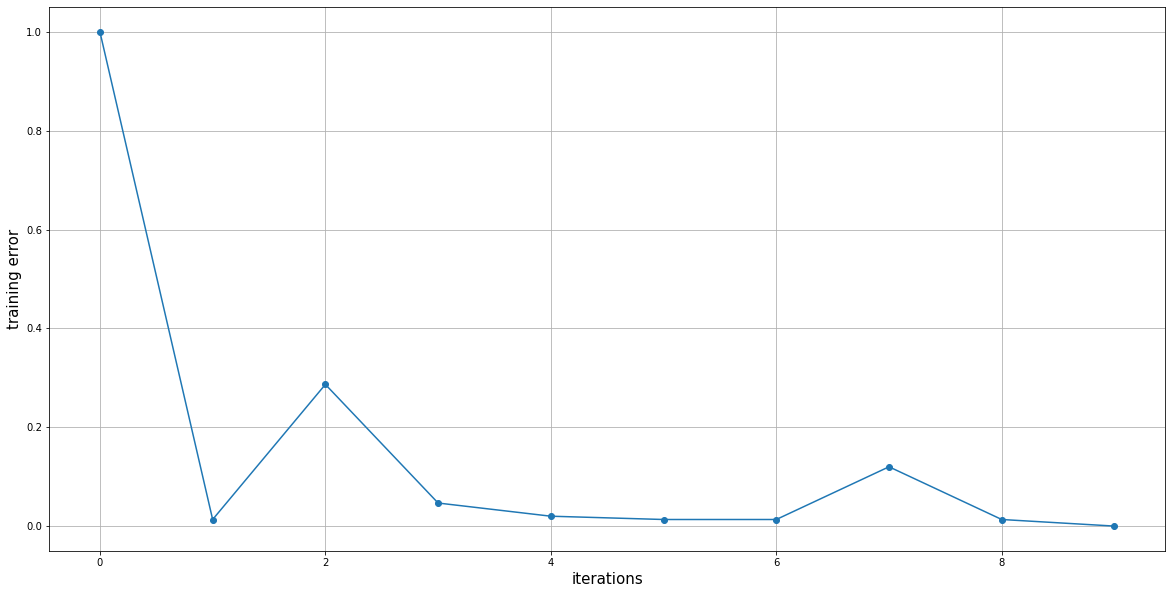

In [9]:
#now run the perceptron for 100 iterations

w_found, error, error_history = perceptron(X_training,Y_training, 100)
print("Training Error of perpceptron (100 iterations): " + str(error))


plt.plot(error_history, '-o')
plt.xlabel("iterations", fontsize=15)
plt.ylabel("training error", fontsize=15)
plt.grid()
plt.show()

**TO DO** use the best model $w\_found$ to predict the labels for the test dataset and print the fraction of misclassified samples in the test set (the test error that is an estimate of the true loss).

In [10]:
# Now use the w_found to make predictions on test dataset

# compute the number of errors
num_errors = 0
for i in range(len(X_test)):
    if((Y_test[i]*(np.dot(w_found, X_test[i,:]))) <= 0):
                num_errors += 1
true_loss_estimate = num_errors/m_test                      # error rate on the test set

#NOTE: you can avoid using num_errors if you prefer, as long as true_loss_estimate is correct
print("Test Error of perpceptron (100 iterations): " + str(true_loss_estimate))

Test Error of perpceptron (100 iterations): 0.06


**TO DO** **[Answer the following]** What about the difference betweeen the training error and the test error  in terms of fraction of misclassified samples)? Explain what you observe. [Write the answer in this cell]

**ANSWER QUESTION 1:** We get a test error that is greater than the training one. Recall that the training error is zero, so all training samples are correctly classified and our model is well suited for this classification task.
The training error is less than the test error because the same data used to fit the model is employed to estimate its training error. Part of the discrepancy between the training error and the test error is because the training set and the test set have different input values despite they should derive from the same sampling proability distribution.

**TO DO** Copy the code from the last 2 cells above in the cell below and repeat the training with 4000 iterations. Then print the error in the training set and the estimate of the true loss obtained from the test set.

Training Error of perpceptron (4000 iterations): 0.0


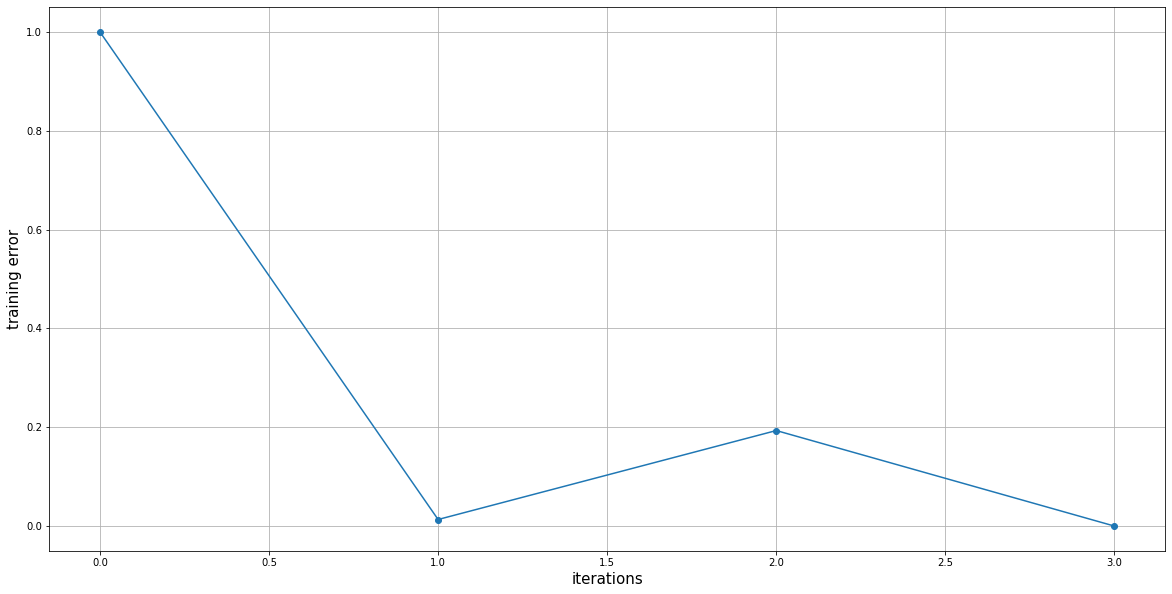


Test Error of perpceptron (4000 iterations): 0.06


In [11]:
# now run the perceptron for 4000 iterations

w_found, error, error_history = perceptron(X_training,Y_training, 4000)
print("Training Error of perpceptron (4000 iterations): " + str(error))

plt.plot(error_history, '-o')
plt.xlabel("iterations", fontsize=15)
plt.ylabel("training error", fontsize=15)
plt.grid()
plt.show()

# Now use the w_found to make predictions on test dataset
# compute the number of errors
num_errors = 0
for i in range(len(X_test)):
    if((Y_test[i]*(np.dot(w_found, X_test[i,:]))) <= 0):
                num_errors += 1
true_loss_estimate = num_errors/m_test                      # error rate on the test set

#NOTE: you can avoid using num_errors if you prefer, as long as true_loss_estimate is correct
print("\nTest Error of perpceptron (4000 iterations): " + str(true_loss_estimate))

**TO DO** [Answer the following] What about the difference betweeen the training error and the test error  in terms of fraction of misclassified samples) when running for a larger number of iterations ? Explain what you observe and compare with the previous case. [Write the answer in this cell]

**ANSWER QUESTION 2:** In this case (4000 iterations) we get the same test and training errors as before (100 iterations), this is because the classification task is archieved before the maximum number of iterations is reached. So then increasing the iterations we don't improve the accuracy of the Perceptron algorithm.

# Logistic Regression
Now we use logistic regression, exploiting the implementation in Scikit-learn, to predict labels. We will also plot the decision region of logistic regression.

We first load the dataset again.

In [12]:
# Load the dataset
filename = 'data/music.csv'
music = csv.reader(open(filename, newline='\n'), delimiter=',')

header = next(music) # skip first line
print(f"Header: {header}\n")

dataset = np.array(list(music))
print(f"Data shape: {dataset.shape}\n")
print("Dataset Example:")
print(dataset[:10,...])

X = dataset[:,:-1].astype(float) # columns 0,1,2 contain the features
Y = dataset[:,-1].astype(int)    # last column contains the labels

Y = 2*Y-1                        # for the perceprton classical--> -1, metal-->1
m = dataset.shape[0]
print("\nNumber of samples loaded:", m)
permutation = np.random.permutation(m) # random permutation

X = X[permutation]
Y = Y[permutation]

Header: ['tempo', 'chroma_stft', 'spectral_centroid', 'label']

Data shape: (200, 4)

Dataset Example:
[['92.28515625' '0.22373830597598895' '2192.798091164326' '0']
 ['161.4990234375' '0.2841730455239421' '1534.0649775815205' '0']
 ['143.5546875' '0.20811288763962318' '1396.8242648287155' '0']
 ['95.703125' '0.31289954089595506' '1680.0882644413368' '0']
 ['123.046875' '0.25857228884109024' '1173.6583080518985' '0']
 ['67.99958881578948' '0.22521197942744986' '715.1893204778178' '0']
 ['95.703125' '0.2840176228179304' '1184.632142061296' '0']
 ['89.10290948275862' '0.2563949682674902' '1358.897902739857' '0']
 ['99.38401442307692' '0.2614892978768399' '1372.8258066922585' '0']
 ['184.5703125' '0.2899787266101455' '1953.0485341566464' '0']]

Number of samples loaded: 200


**TO DO** As for the previous part, divide the data into training and test (75%-25%) and add a 1 as first component to each sample.

In [13]:
#Divide in training and test: make sure that your training set
#contains at least 10 elements from class 1 and at least 10 elements
#from class -1! If it does not, modify the code so to apply more random
#permutations (or the same permutation multiple times) until this happens.
#IMPORTANT: do not change the random seed.

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=0)


print("\nY_training:\n", Y_train)                                        # to make sure that Y_training contains both 1 and -1
print("Number of classical instances in Y_training:", np.sum(Y_train==-1))
print("Number of metal instances in Y_training:", np.sum(Y_train==1))
print("Shape of X_training set: " + str(X_train.shape))
print("Shape of Y_training set: " + str(Y_train.shape))

print("\nY_test:\n", Y_test)
print("Number of classical instances in Y_test:", np.sum(Y_test==-1))
print("Number of metal instances in Y_test:", np.sum(Y_test==1))
print("Shape of X_test set: " + str(X_test.shape))
print("Shape of Y_test set: " + str(Y_test.shape))


Y_training:
 [ 1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
 -1  1 -1  1  1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1
 -1  1 -1  1 -1 -1 -1 -1  1  1 -1  1  1  1  1 -1  1 -1  1  1  1 -1 -1 -1
  1  1 -1  1 -1  1 -1  1  1 -1  1  1 -1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1
  1  1  1  1 -1  1  1  1 -1  1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1
 -1 -1  1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1  1 -1 -1
  1  1  1  1  1  1]
Number of classical instances in Y_training: 73
Number of metal instances in Y_training: 77
Shape of X_training set: (150, 3)
Shape of Y_training set: (150,)

Y_test:
 [ 1 -1 -1 -1  1  1 -1 -1  1 -1  1  1  1  1  1 -1 -1 -1  1  1 -1  1 -1  1
 -1  1 -1 -1 -1  1 -1 -1  1  1  1  1 -1  1 -1 -1 -1 -1 -1  1  1 -1  1 -1
 -1 -1]
Number of classical instances in Y_test: 27
Number of metal instances in Y_test: 23
Shape of X_test set: (50, 3)
Shape of Y_test set: (50,)


To define a logistic regression model in Scikit-learn use the instruction

$linear\_model.LogisticRegression(C=1e5)$

($C$ is a parameter related to *regularization*, a technique that
we will see later in the course. Setting it to a high value is almost
as ignoring regularization, so the instruction above corresponds to the
logistic regression you have seen in class.)

To learn the model you need to use the $fit(...)$ instruction and to predict you need to use the $predict(...)$ function. See the Scikit-learn documentation for how to use it.

**TO DO** Define the logistic regression model, then learn the model using the training set and predict on the test set. Then print the fraction of samples misclassified in the training set and in the test set.

Fraction of correct predictions on training set: 1.0
Error rate on training set: 0.0

Fraction of correct predictions on test set: 0.98
Error rate on test set: 0.020000000000000018


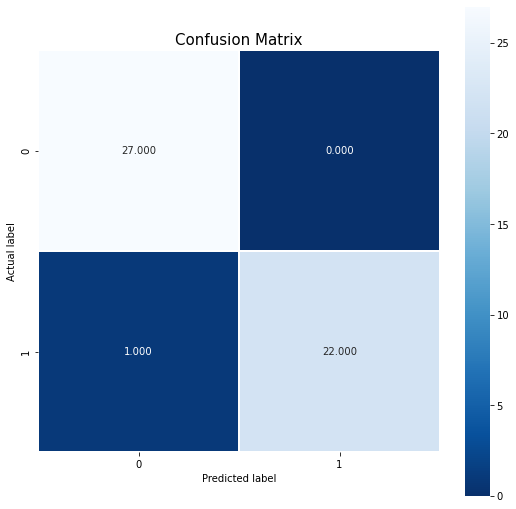

In [14]:
#part on logistic regression for 2 classes
logisticRegr = linear_model.LogisticRegression(C=1e5) #a large C disables regularization

#learn from training set
fit = logisticRegr.fit(X_train, Y_train)

#predict on training set
prediction = logisticRegr.predict(X_train)

#print the error rate = fraction of misclassified samples
error_rate_training = 1 - logisticRegr.score(X_train, Y_train)
print("Fraction of correct predictions on training set:", logisticRegr.score(X_train, Y_train))
print("Error rate on training set: "+str(error_rate_training))

#predict on test set
prediction = logisticRegr.predict(X_test)

#print the error rate = fraction of misclassified samples
error_rate_test = 1 - logisticRegr.score(X_test, Y_test)
print("\nFraction of correct predictions on test set:", logisticRegr.score(X_test, Y_test))
print("Error rate on test set: " + str(error_rate_test))


score = logisticRegr.score(X_test, Y_test)
cm = metrics.confusion_matrix(Y_test, prediction)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);

**TO DO** Now pick two features and restrict the dataset to include only two features, whose indices are specified in the $feature$ vector below. Then split into training and test. Which features are you going to select ?

In [15]:
# Boruta algorithm for feature selection

forest = ensemble.RandomForestRegressor(n_jobs = -1)

boruta = BorutaPy(estimator = forest, n_estimators = 'auto', max_iter = 100)
boruta.fit(X_train, Y_train)

features_list = np.array(['tempo', 'chroma_stft', 'spectral_centroid'])
importantFeatures_bool = boruta.support_
importantFeatures = features_list[importantFeatures_bool]
print("The best 2 features according to Boruta algorithm are:", importantFeatures)    

#green_area = X_train[:, boruta.support_]
#blue_area = X_train[:, boruta.support_weak_]
#print('features in the green area:\n', green_area)
#print('shape green area:\n', green_area.shape)
#print('features in the blue area:\n', blue_area)
#print('shape blue area:\n', blue_area.shape)

The best 2 features according to Boruta algorithm are: ['chroma_stft' 'spectral_centroid']


In [16]:
# to make the plot we need to reduce the data to 2D, so we choose two features

X_reduced = X[:, importantFeatures_bool]


X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_reduced, Y, test_size=0.25, random_state=0)

print("\nY_training:\n", Y_train)                                         # to make sure that Y_training contains both 1 and -1
print("Number of classical instances in Y_training:", np.sum(Y_train==-1))
print("Number of metal instances in Y_training:", np.sum(Y_train==1))
print("Shape of X_training set: " + str(X_train.shape))
print("Shape of Y_training set: " + str(Y_train.shape))

print("\nY_test:\n", Y_test)
print("Number of classical instances in Y_test:", np.sum(Y_test==-1))
print("Number of metal instances in Y_test:", np.sum(Y_test==1))
print("Shape of X_test set: " + str(X_test.shape))
print("Shape of Y_test set: " + str(Y_test.shape))



'''# to make the plot we need to reduce the data to 2D, so we choose two features
features_list = ['tempo', 'chroma_stft', 'spectral_centroid']
index_feature1 = # Select the best 2 features according to your experiments
index_feature2 = # Select the best 2 features according to your experiments
features = [index_feature1, index_feature2]

feature_name0 = features_list[features[0]]
feature_name1 = features_list[features[1]]

X_reduced = X[:,features]

X_training = # PLACE YOUR CODE
Y_training = # PLACE YOUR CODE

X_test = # PLACE YOUR CODE
Y_test = # PLACE YOUR CODE'''


Y_training:
 [ 1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
 -1  1 -1  1  1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1
 -1  1 -1  1 -1 -1 -1 -1  1  1 -1  1  1  1  1 -1  1 -1  1  1  1 -1 -1 -1
  1  1 -1  1 -1  1 -1  1  1 -1  1  1 -1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1
  1  1  1  1 -1  1  1  1 -1  1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1
 -1 -1  1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1  1 -1 -1
  1  1  1  1  1  1]
Number of classical instances in Y_training: 73
Number of metal instances in Y_training: 77
Shape of X_training set: (150, 2)
Shape of Y_training set: (150,)

Y_test:
 [ 1 -1 -1 -1  1  1 -1 -1  1 -1  1  1  1  1  1 -1 -1 -1  1  1 -1  1 -1  1
 -1  1 -1 -1 -1  1 -1 -1  1  1  1  1 -1  1 -1 -1 -1 -1 -1  1  1 -1  1 -1
 -1 -1]
Number of classical instances in Y_test: 27
Number of metal instances in Y_test: 23
Shape of X_test set: (50, 2)
Shape of Y_test set: (50,)


"# to make the plot we need to reduce the data to 2D, so we choose two features\nfeatures_list = ['tempo', 'chroma_stft', 'spectral_centroid']\nindex_feature1 = # Select the best 2 features according to your experiments\nindex_feature2 = # Select the best 2 features according to your experiments\nfeatures = [index_feature1, index_feature2]\n\nfeature_name0 = features_list[features[0]]\nfeature_name1 = features_list[features[1]]\n\nX_reduced = X[:,features]\n\nX_training = # PLACE YOUR CODE\nY_training = # PLACE YOUR CODE\n\nX_test = # PLACE YOUR CODE\nY_test = # PLACE YOUR CODE"

Now learn a model using the training data and measure the performances.

Fraction of correct predictions on training set: 0.9866666666666667
Error rate on training set: 0.013333333333333308

Fraction of correct predictions on test set: 0.96
Error rate on test set: 0.040000000000000036


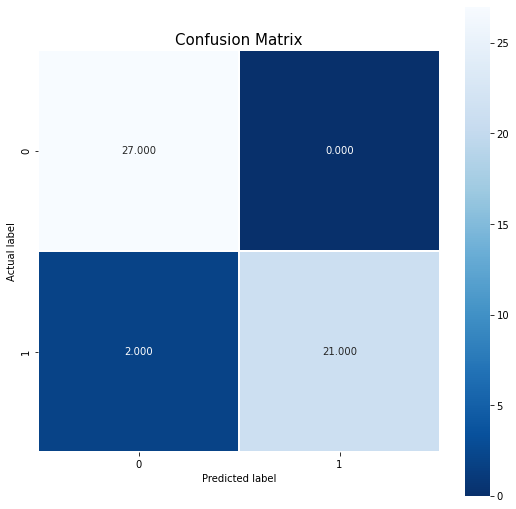

In [17]:
logisticRegr = linear_model.LogisticRegression(C=1e5)

# learning from training data
fit = logisticRegr.fit(X_train, Y_train)

#print the error rate = fraction of misclassified samples
error_rate_train =  1 - logisticRegr.score(X_train, Y_train)

print("Fraction of correct predictions on training set:", logisticRegr.score(X_train, Y_train))
print("Error rate on training set: " + str(error_rate_train))

#predict on test set
prediction = logisticRegr.predict(X_test)

#print the error rate = fraction of misclassified samples
error_rate_test = 1 - logisticRegr.score(X_test, Y_test)
print("\nFraction of correct predictions on test set:", logisticRegr.score(X_test, Y_test))
print("Error rate on test set: " + str(error_rate_test))

#score = logisticRegr.score(X_test, Y_test)
cm = metrics.confusion_matrix(Y_test, prediction)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);

**TO DO** [Answer the following] Which features did you select and why ? Compare the perfromances with the ones of the case with all the 3 features and comment about the results. [Write the answer in this cell]

**ANSWER QUESTION 3:** I'm going to select the two best features according to the Boruta algorithm, the aim is simplifying the problem by removing unuseful features which would introduce unnecessary noise. In this case we obtain chroma_stft and spectral_centroid to be the best: the result can be justified noticing that there can be classical music with very high bpm (tempo) and viceversa for metal/rock music.


- ID Number seed case: the performance don't increase respect to the full features case. What I may be seeing is that, while the tempo feature introduces some noise in the data, it might still be providing some independent information that the model can use for helping it train and generalize more. In other words tempo feature is still useful for prediction accuracy.
- Changing seed case: the performance it's the same respect to the full features case. What I may be witnessing is that the tempo feature doesn't introduces enough noise to adversely affect the prediction accuracy.

If everything is ok, the code below uses the model in $logreg$ to plot the decision region for the two features chosen above, with colors denoting the predicted value. It also plots the points (with correct labels) in the training set. It makes a similar plot for the test set.

<ipython-input-18-d6db46b0d8bb>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


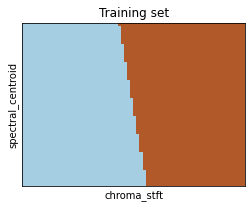

<ipython-input-18-d6db46b0d8bb>:39: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


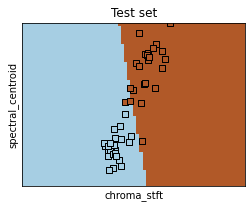

In [18]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

# NOTICE: This visualization code has been developed for a "standard" solution of the notebook, 
# it could be necessary to make some fixes to adapt to your implementation

feature_name0 = importantFeatures[0]
feature_name1 = importantFeatures[1]

h = .02  # step size in the mesh
x_min, x_max = X_reduced[:, 0].min() - .5, X_reduced[:, 0].max() + .5
y_min, y_max = X_reduced[:, 1].min() - .5, X_reduced[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logisticRegr.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_training[:, 0], X_training[:, 1], c=Y_training, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Training set')

plt.show()

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the test points 
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k', cmap=plt.cm.Paired, marker='s')
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Test set')

plt.show()

# 2) Linear Regression on the Boston House Price dataset

### Dataset description: 

The Boston House Price Dataset involves the prediction of a house price in thousands of dollars given details about the house and its neighborhood.

The dataset contains a total of 500 observations, which relate 13 input features to an output variable (house price).

The variable names are as follows:

CRIM: per capita crime rate by town.

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of nonretail business acres per town.

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

NOX: nitric oxides concentration (parts per 10 million).

RM: average number of rooms per dwelling.

AGE: proportion of owner-occupied units built prior to 1940.

DIS: weighted distances to five Boston employment centers.

RAD: index of accessibility to radial highways.

TAX: full-value property-tax rate per $10,000.

PTRATIO: pupil-teacher ratio by town.

B: 1000*(Bk – 0.63)2 where Bk is the proportion of blacks by town.

LSTAT: % lower status of the population.

MEDV: Median value of owner-occupied homes in $1000s.
    

In [19]:
#needed if you get the IPython/javascript error on the in-line plots
%matplotlib nbagg  

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats

In [20]:
#Import Data: Load the data from a .csv file

filename = "data/house.csv"
Data = np.genfromtxt(filename, delimiter=';',skip_header=1)

#A quick overview of data, to inspect the data you can use the method describe()

dataDescription = stats.describe(Data)
print(dataDescription)
print ("\nShape of data array: " + str(Data.shape))

#for more interesting visualization: use Panda!


#panda_data = pd.read_csv(filename, sep=";").values
#panda_data

DescribeResult(nobs=500, minmax=(array([  0.00632,   0.     ,   0.46   ,   0.     ,   0.385  ,   3.561  ,
         2.9    ,   1.1296 ,   1.     , 187.     ,  12.6    ,   0.32   ,
         1.73   ,  50.     ]), array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        37.97  , 500.    ])), mean=array([  3.65578576,  11.5       ,  11.13174   ,   0.07      ,
         0.5544514 ,   6.28297   ,  68.4246    ,   3.8119318 ,
         9.642     , 409.624     ,  18.4286    , 356.20804   ,
        12.69874   , 225.68      ]), variance=array([   74.72521949,   548.90581162,    47.61982282,     0.06523046,
           0.01358383,     0.49761833,   799.31416317,     4.46304043,
          75.96175952, 28560.51966333,     4.67663531,  8416.5713729 ,
          51.3361942 ,  8529.82925852]), skewness=array([ 5.17851447,  2.19924065,  0.29469001,  3.37060575,  0.72944382,
        0.40691344, -0.58266003,  0.99061328,  0.98

# Split data in training and test sets



Given $m$ total data, denote with $m_{t}$ the part used for training. Keep $m_t$ data as training data, and $m_{test}:= m-m_{t}$. For instance one can take $m_t=0.7m$ of the data as training and $m_{test}=0.3m$ as testing. Let us define as define

$\bullet$ $S_{t}$ the training data set

$\bullet$ $S_{test}$ the testing data set


The reason for this splitting is as follows:

TRAINING DATA: The training data are used to compute the empirical loss
$$
L_S(h) = \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
which is used to estimate $h$ in a given model class ${\cal H}$.
i.e. 
$$
\hat{h} = {\rm arg\; min}_{h \in {\cal H}} \, L_S(h)
$$

TESTING DATA: The test data set can be used to estimate the performance of the final estimated model
$\hat h_{\hat d_j}$ using:
$$
L_{{\cal D}}(\hat h_{\hat d_j}) \simeq \frac{1}{m_{test}} \sum_{ z_i \in S_{test}} \ell(\hat h_{\hat d_j},z_i)
$$


**TO DO**: split the data in training and test sets (70%-30%)

In [21]:
#get number of total samples
num_total_samples = Data.shape[0]

print ("Total number of samples: ", num_total_samples)

m_t = int(num_total_samples*.7)

print ("Cardinality of Training Set: ", m_t)

#shuffle the data
np.random.shuffle(Data)

X = Data[:, :13]
print("\nX:\n", X)
print("X shape:\n", X.shape)

Y = Data[:, 13]
print("\nY:\n", Y)
print("Y shape:\n", Y.shape)

#training data 
X_training = X[:m_t,]
Y_training = Y[:m_t,]
print ("\nTraining input data size (X_training): ", X_training.shape)
print ("Training output data size (Y_training): ", Y_training.shape)

#test data, to be used to estimate the true loss of the final model(s)
X_test = X[m_t:,]
Y_test = Y[m_t:,]
print ("\nTest input data size (X_test): ", X_test.shape)
print ("Test output data size (Y_test): ", Y_test.shape)

Total number of samples:  500
Cardinality of Training Set:  350

X:
 [[  0.07165   0.       25.65    ...  19.1     377.67     14.27   ]
 [  0.06127  40.        6.41    ...  17.6     393.45      4.16   ]
 [  3.1636    0.       18.1     ...  20.2     334.4      14.13   ]
 ...
 [  0.09849   0.       25.65    ...  19.1     379.38     17.58   ]
 [  0.05083   0.        5.19    ...  20.2     389.71      5.68   ]
 [  0.13262   0.        8.56    ...  20.9     394.05     16.47   ]]
X shape:
 (500, 13)

Y:
 [203. 331. 199. 244.  81. 214. 296. 239. 127. 167. 296. 108. 205. 163.
 136. 193.  84. 166. 151. 230. 243. 185. 208. 156. 241. 200. 146. 214.
 105. 331.  85. 195. 127.  50. 387. 361. 212. 246. 290.  85. 193. 199.
 145. 214. 290. 239. 178. 209. 204. 245. 275. 250. 244. 162. 160. 162.
 262. 171. 301. 225. 372. 187. 250. 233. 191. 280. 500. 232. 187. 165.
 217. 431.  70. 500. 150. 198. 207. 228. 152. 212. 140. 320. 347. 154.
 203.  63. 203. 226. 166. 229. 194. 192. 310. 201. 178. 354. 182. 172.
 

# Data Normalization
It is common practice in Statistics and Machine Learning to scale the data (= each variable) so that it is centered (zero mean) and has standard deviation equal to 1. This helps in terms of numerical conditioning of the (inverse) problems of estimating the model (the coefficients of the linear regression in this case), as well as to give the same scale to all the coefficients.

In [22]:
# scale the data

# standardize the input matrix
from sklearn import preprocessing
# the transformation is computed on training data and then used on all the 3 sets
scaler = preprocessing.StandardScaler().fit(X_training) 

np.set_printoptions(suppress=True) # sets to zero floating point numbers < min_float_eps
X_training = scaler.transform(X_training)
print ("Mean of the training input data (X_training):\n", X_training.mean(axis=0))
print ("\nStd of the training input data (X_training):\n", X_training.std(axis=0))

X_test = scaler.transform(X_test) # use the same transformation on test data
print ("\nMean of the test input data (X_test):\n", X_test.mean(axis=0))
print ("\nStd of the test input data (X_test):\n", X_test.std(axis=0))

Mean of the training input data (X_training):
 [-0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0.]

Std of the training input data (X_training):
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Mean of the test input data (X_test):
 [-0.08819423 -0.00980409  0.01192077 -0.01849001 -0.00556665 -0.0177523
  0.00471868 -0.05767427 -0.05386668 -0.08631768 -0.13490334 -0.01069124
 -0.02627977]

Std of the test input data (X_test):
 [0.67094466 0.94361121 1.02304669 0.96856577 1.00708691 1.05834287
 1.0199227  0.95189492 0.99533489 1.00734758 1.01677899 1.04325344
 1.01830293]


# Model Training 

The model is trained (= estimated) minimizing the empirical error
$$
L_S(h) := \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
When the loss function is the quadratic loss
$$
\ell(h,z) := (y - h(x))^2
$$
we define  the Residual Sum of Squares (RSS) as
$$
RSS(h):= \sum_{z_i \in S_{t}} \ell(h,z_i) = \sum_{z_i \in S_{t}} (y_i - h(x_i))^2
$$ so that the training error becomes
$$
L_S(h) = \frac{RSS(h)}{m_t}
$$

We recal that, for linear models we have $h(x) = <w,x>$ and the Empirical error $L_S(h)$ can be written
in terms of the vector of parameters $w$ in the form
$$
L_S(w) = \frac{1}{m_t} \|Y - X w\|^2
$$
where $Y$ and $X$ are the matrices whose $i-$th row are, respectively, the output data $y_i$ and the input vectors $x_i^\top$.


 **TO DO:** compute the linear regression coefficients using np.linalg.lstsq from scikitlear 
 

In [23]:
#compute linear regression coefficients for training data

#add a 1 at the beginning of each sample for training, and testing (use homogeneous coordinates)
m_training = X_training.shape[0]
X_trainingH = np.hstack((np.ones((m_training,1)), X_training)) # H: in homogeneous coordinates

m_test = X_test.shape[0]
X_testH = np.hstack((np.ones((m_test,1)), X_test))  # H: in homogeneous coordinates

# Compute the least-squares coefficients using linalg.lstsq
w_np, RSStr_np, rank_Xtr, sv_Xtr = np.linalg.lstsq(X_trainingH, Y_training, rcond=None)
print("LS coefficients with numpy lstsq:\n", w_np)



LS coefficients with numpy lstsq:
 [221.90571429  -8.72227511   7.56698967  -0.04917246   8.7969106
 -19.21843405  22.73085722  -0.86650702 -29.81444885  21.69230209
 -18.73460039 -19.69640471   6.91094895 -38.80983011]


In [24]:
# compute Residual sums of squares 
prediction_training = np.dot(X_trainingH, w_np)
RSStr_hand = (np.power(Y_training - prediction_training, 2)).sum(axis=0) 

print("RSS by hand: ", RSStr_hand)                      
print("RSS with numpy lstsq: ", RSStr_np)
print("Empirical risk with numpy lstsq:", RSStr_np/m_training)

RSS by hand:  748398.9133352786
RSS with numpy lstsq:  [748398.91333528]
Empirical risk with numpy lstsq: [2138.28260953]


In [25]:
'''import statsmodels.api as sm           # Check if all is working!!
x = sm.add_constant(X_training)
y = Y_training

model = sm.OLS(y, x).fit()
print(model.summary())

print(model.ssr)'''

'import statsmodels.api as sm           # Check if all is working!!\nx = sm.add_constant(X_training)\ny = Y_training\n\nmodel = sm.OLS(y, x).fit()\nprint(model.summary())\n\nprint(model.ssr)'

## Data prediction 

Compute the output predictions on both training and test set and compute the Residual Sum of Squares (RSS). 

**TO DO**: Compute these quantities on  training and test sets.

In [26]:
#compute predictions on training and test
#prediction_training = np.dot(X_trainingH, w_np)        # (w_np*X_trainingH).sum(axis=1)
prediction_test = np.dot(X_testH, w_np)                 # (w_np*X_testH).sum(axis=1)

#what about the loss for points in the test data?
RSStest_hand = (np.power(Y_test - prediction_test, 2).sum(axis=0))
RSS_test = m_test*metrics.mean_squared_error(Y_test, prediction_test)  

print("RSS by hand: ", RSStest_hand)   
print("RSS on test data:",  RSS_test)
print("Loss estimated from test data:", RSS_test/m_test)

RSS by hand:  358181.94264055043
RSS on test data: 358181.94264055043
Loss estimated from test data: 2387.8796176036694


### QUESTION 4: Comment on the results you get and on the difference between the train and test errors.

We get a test error slightly greater than the training error, it seems that the two errors are compatible between each others and that the algorithm selects a model at the sweet spot between underfitting and overfitting (To be completely sure we should apply validation).

## Ordinary Least-Squares using scikit-learn
Another fast way to compute the LS estimate is through sklearn.linear_model (for this function homogeneous coordinates are not needed).

In [27]:
from sklearn import linear_model

# build the LinearRegression() model and train it
LinReg = linear_model.LinearRegression()
LinReg.fit(X_training, Y_training)

print("Intercept:", LinReg.intercept_)
print("\nLeast-Squares Coefficients:\n", LinReg.coef_)

# predict output values on training and test sets
Ypred_training = LinReg.predict(X_training)
Ypred_test = LinReg.predict(X_test)

# return a prediction score based on the coefficient of determination
print("\nMeasure on training data:", 1-LinReg.score(X_training, Y_training))

Intercept: 221.90571428571454

Least-Squares Coefficients:
 [ -8.72227511   7.56698967  -0.04917246   8.7969106  -19.21843405
  22.73085722  -0.86650702 -29.81444885  21.69230209 -18.73460039
 -19.69640471   6.91094895 -38.80983011]

Measure on training data: 0.26268976681035205


In [28]:
'''from sklearn.linear_model import LinearRegression

x = pd.DataFrame(X, columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"])

regressor = LinearRegression()
regressor.fit(X_training, Y_training)
print("Intercept:", regressor.intercept_)
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
print("\n", coeff_df)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
print("\n", df)

from sklearn import metrics
print('\n\nMean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('\nSquared Error:', len(Y_test)*metrics.mean_squared_error(Y_test, y_pred))'''

'from sklearn.linear_model import LinearRegression\n\nx = pd.DataFrame(X, columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"])\n\nregressor = LinearRegression()\nregressor.fit(X_training, Y_training)\nprint("Intercept:", regressor.intercept_)\ncoeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=[\'Coefficient\'])\nprint("\n", coeff_df)\n\ny_pred = regressor.predict(X_test)\ndf = pd.DataFrame({\'Actual\': Y_test, \'Predicted\': y_pred})\nprint("\n", df)\n\nfrom sklearn import metrics\nprint(\'\n\nMean Absolute Error:\', metrics.mean_absolute_error(Y_test, y_pred))\nprint(\'\nMean Squared Error:\', metrics.mean_squared_error(Y_test, y_pred))\nprint(\'\nSquared Error:\', len(Y_test)*metrics.mean_squared_error(Y_test, y_pred))'